In [111]:
# root directory
root_path = f"../../../../"

In [112]:
import pandas as pd

In [113]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/data/updated/dataset_extended_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(12163, 67)


,mx,inchikey_additive,inchikey_solvent,label,gap_oh,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,heavy_atom_count_additive,isotope_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,chloroform,dodecylphosphonic acid,False,False,True
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,hexan-1-ol,dodecylphosphonic acid,False,False,True
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,oxolane,dodecylphosphonic acid,False,False,True
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,propan-2-one,dodecylphosphonic acid,False,False,True
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,...,16,0,0,0,1,acetonitrile,dodecylphosphonic acid,False,False,True


In [114]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [115]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [116]:
df_mx_solvent_data_labeled['method_hf'] = df_mx_solvent_data_labeled['method_hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_licl/hf'] = df_mx_solvent_data_labeled['method_licl/hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_lif/hcl'] = df_mx_solvent_data_labeled['method_lif/hcl'].astype('category').cat.codes

In [117]:
df_mx_solvent_data_labeled.head()

,mx,inchikey_additive,inchikey_solvent,label,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,...,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,solvent,additive,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,HEDRZPFGACZZDS-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,chloroform,dodecylphosphonic acid,0,0,1
1,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,ZSIAUFGUXNUGDI-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,hexan-1-ol,dodecylphosphonic acid,0,0,1
2,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WYURNTSHIVDZCO-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,oxolane,dodecylphosphonic acid,0,0,1
3,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,CSCPPACGZOOCGX-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,propan-2-one,dodecylphosphonic acid,0,0,1
4,Ti3C2,SVMUEEINWGBIPD-UHFFFAOYSA-N,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,11,16,0,0,1,acetonitrile,dodecylphosphonic acid,0,0,1


In [118]:
df_mx_solvent_data_labeled.columns

Index(['mx', 'inchikey_additive', 'inchikey_solvent', 'label',
       'work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d_solvent', 'delta_p_solvent',
       'delta_h_solvent', 'molar_volume_solvent', 'boiling_point_solvent',
       'molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
       'complexity_additive', 'h_bond_donor_count_additive',
       'h_bond_acceptor_count_additive', 'rotatable_bond_count_additive',
       'heavy_atom_count

In [119]:
features = ['work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'delta_d_solvent', 'delta_p_solvent',
       'delta_h_solvent', 'molar_volume_solvent', 'boiling_point_solvent',
       'molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
       'complexity_additive', 'h_bond_donor_count_additive',
       'h_bond_acceptor_count_additive', 'rotatable_bond_count_additive',
       'heavy_atom_count_additive', 'atom_stereo_count_additive',
       'bond_stereo_count_additive', 'covalent_unit_count_additive', 'method_hf', 'method_licl/hf', 'method_lif/hcl']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [120]:
X.head()

,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,plasmafrequency_y_oh,has_inversion_symmetry_oh,gap_o,...,h_bond_donor_count_additive,h_bond_acceptor_count_additive,rotatable_bond_count_additive,heavy_atom_count_additive,atom_stereo_count_additive,bond_stereo_count_additive,covalent_unit_count_additive,method_hf,method_licl/hf,method_lif/hcl
0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
2,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
3,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1
4,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2,3,11,16,0,0,1,0,0,1


In [121]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def plot_feature_distributions(data, features, title, plots_per_row=4):
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{title}: {feature}")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

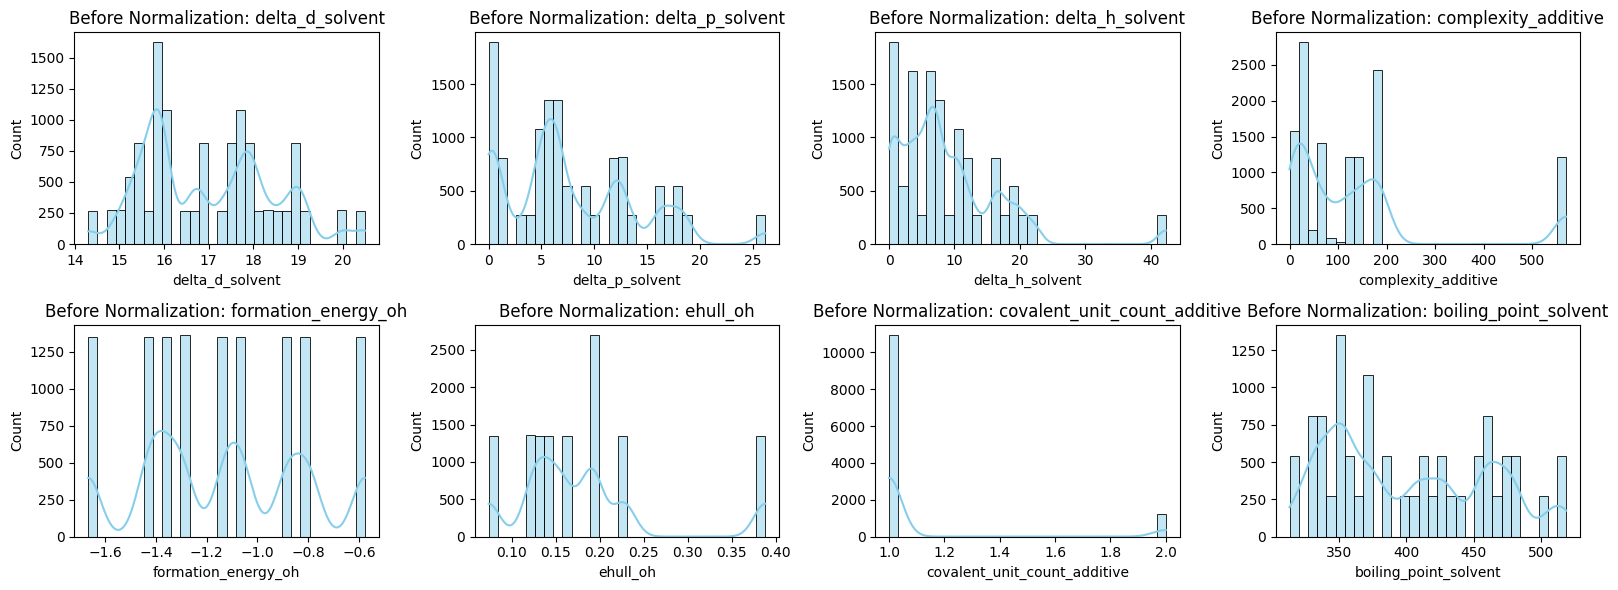

In [124]:
plot_feature = ['delta_d_solvent', 'delta_p_solvent',
       'delta_h_solvent', 'complexity_additive',
   'formation_energy_oh','ehull_oh', 'covalent_unit_count_additive',
   'boiling_point_solvent']
plot_feature_distributions(X, plot_feature, "Before Normalization")

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

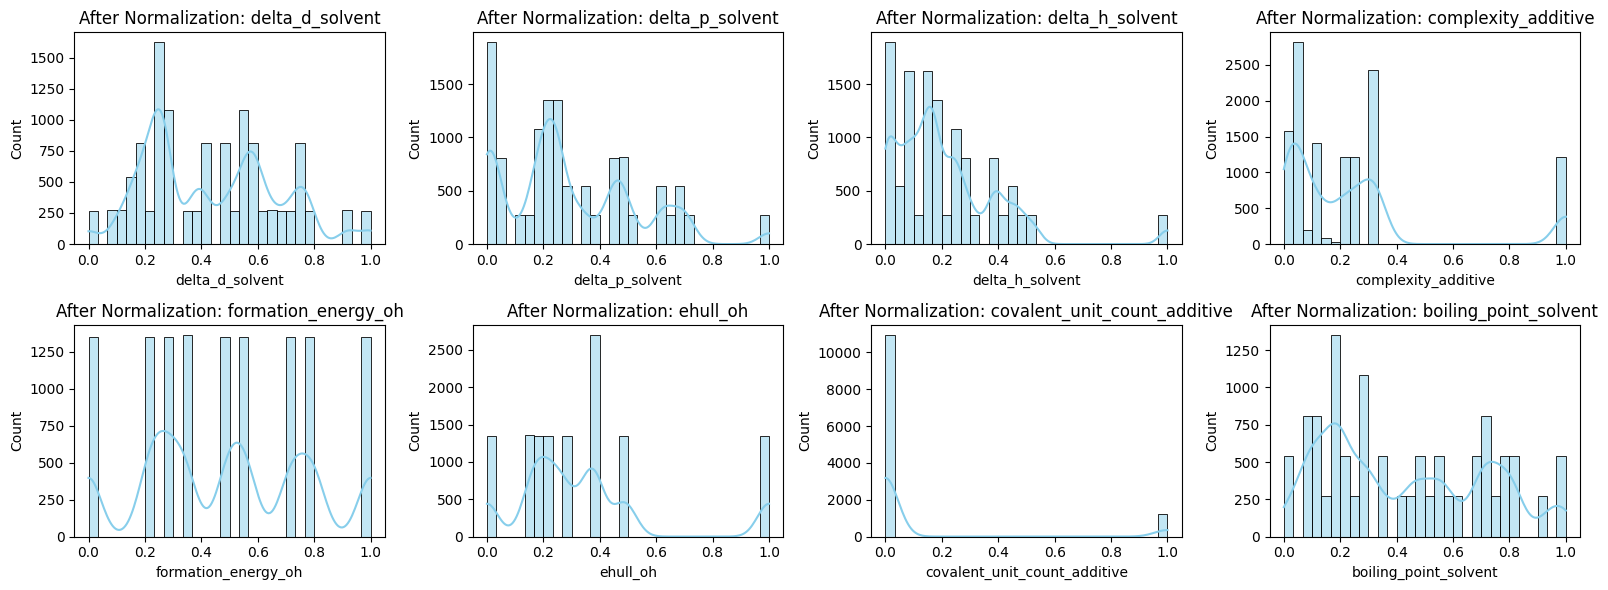

In [127]:
plot_feature_distributions(X_scaled_df, plot_feature, "After Normalization")

In [128]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [129]:
from sklearn.impute import KNNImputer

In [130]:
# impute missing data entries using K nearest neighbors
imputer = KNNImputer()
X_impute = imputer.fit_transform(X_scaled)

In [131]:
# PCA for inputs
pca = PCA(n_components=None, random_state=42)
pca.fit(X_impute)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


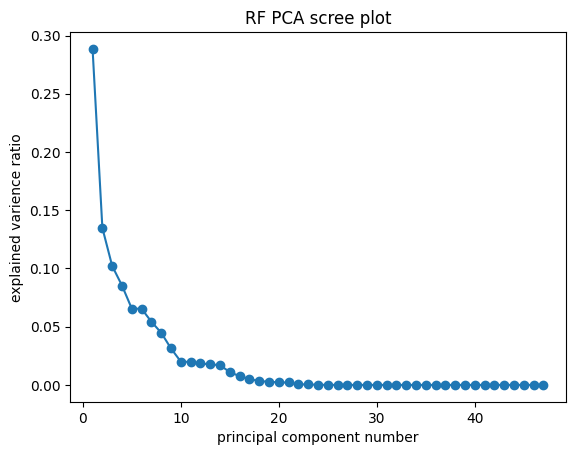

In [132]:
# scree plot
explained_variance = pca.explained_variance_ratio_
component_numbers = np.arange(len(explained_variance)) + 1
plt.plot(component_numbers, explained_variance, marker='o')
plt.xlabel('principal component number')
plt.ylabel('explained varience ratio')
plt.title('RF PCA scree plot')
# plt.xticks(np.arange(0, 50, step=2))
plt.show()

In [ ]:
pca = PCA(n_components=22, random_state=42)
X_pca = pca.fit_transform(X_impute)

In [134]:
X_train = X_pca[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [135]:
X_test = X_pca[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [136]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [137]:
print(len(X_train_train))
print(len(X_val))
print(len(y_train_train))
print(len(y_val))

115
29
115
29


In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [139]:
param_grid = {
    'n_estimators': [10, 25, 100],
    'max_samples': [0.8, 1.0]
}

In [140]:
base_rf = RandomForestClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_rf, random_state=42)

In [141]:
rand_search = RandomizedSearchCV(bagging_clf, param_grid, cv=5, n_jobs=1, scoring='accuracy', verbose=2)
rand_search.fit(X_train_train, y_train_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\liamr\Documents\Repos\MXene_Solvent\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.6s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.5s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.6s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   0.6s
[CV] END ...................max_samples=0.8, n_estimators=10; total time=   1.0s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   2.4s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   2.5s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   2.9s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   2.8s
[CV] END ...................max_samples=0.8, n_estimators=25; total time=   1.9s
[CV] END ..................max_samples=0.8, n_estimators=100; total time=   8.8s
[CV] END ..................max_samples=0.8, n_estimators=100; total time=   7.9s
[CV] END ..................m

,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'max_samples': [0.8, 1.0], 'n_estimators': [10, 25, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [143]:
best_model = rand_search.best_estimator_
print(best_model)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100, random_state=42)


In [144]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Report:\n", classification_report(y_val, y_val_pred))

Train Accuracy: 0.9652777777777778
Val Accuracy: 0.9310344827586207
Validation Report:
               precision    recall  f1-score   support

          -1       0.89      0.89      0.89         9
           1       0.95      0.95      0.95        20

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29



In [145]:
proba_unlabeled = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

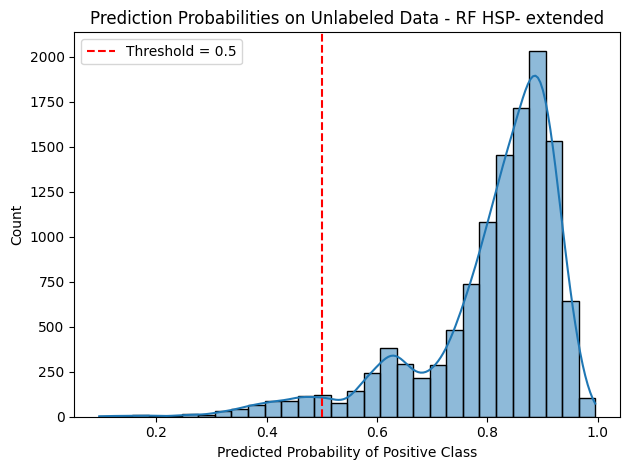

In [146]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - RF HSP- extended")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [147]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
same_solvent_additive = high_conf[high_conf['solvent'] == high_conf['additive']]
top_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=False).head(20)
print("solvent the same as additive")
print(top_same[['mx', 'solvent', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])


solvent the same as additive
        mx                   solvent  predicted_proba  method_lif/hcl  \
542   V2C1     methylsulfinylmethane         0.977498               0   
541   V2C1  1-methylpyrrolidin-2-one         0.976795               0   
498   V2C1     methylsulfinylmethane         0.976338               1   
565   V2C1              oxolan-2-one         0.974140               0   
521   V2C1              oxolan-2-one         0.973540               1   
587   V2C1     methylsulfinylmethane         0.960852               0   
555   V2C1     N,N-dimethylacetamide         0.959796               0   
508   V2C1         N-methylformamide         0.958857               1   
511   V2C1     N,N-dimethylacetamide         0.958629               1   
543   V2C1     N,N-dimethylformamide         0.958077               0   
540   V2C1                   ethanol         0.956764               0   
552   V2C1         N-methylformamide         0.955050               0   
276  Ti2C1     methyls

In [149]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
high_conf = high_conf[high_conf['predicted_proba'] < 0.99]
same_solvent_additive = high_conf[high_conf['solvent'] != high_conf['additive']]
top_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=False).head(20)
print("solvent different than additive")
print(top_same[['mx', 'solvent', 'additive',  'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent different than additive
         mx                solvent  \
1478  Ti3C2      N-methylformamide   
1559  Ti3C2            propan-1-ol   
2086  Ti3C2                oxolane   
1596  Ti3C2           oxolan-2-one   
2290  Ti3C2  N,N-dimethylacetamide   
2194  Ti3C2  N,N-dimethylformamide   
2299  Ti3C2     1,1-dichloroethane   
4977   V2C1                ethanol   
2263  Ti3C2      N-methylformamide   
1595  Ti3C2           oxolan-2-one   
1878  Ti3C2      N-methylformamide   
2136  Ti3C2         methyl acetate   
1304  Ti3C2                oxolane   
1879  Ti3C2      N-methylformamide   
5120   V2C1  N,N-dimethylacetamide   
5121   V2C1  N,N-dimethylacetamide   
5003   V2C1  methylsulfinylmethane   
1798  Ti3C2  N,N-dimethylformamide   
1906  Ti3C2  N,N-dimethylacetamide   
5525   V2C1  N,N-dimethylacetamide   

                                               additive  predicted_proba  \
1478                              phenylphosphonic acid         0.989845   
1559             

In [150]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.3]
same_solvent_additive = low_conf[low_conf['solvent'] == low_conf['additive']]
bott_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=True).head(20)
print("solvent the same as additive")
print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):")
print(bott_same[['mx', 'solvent', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent the same as additive
MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):
        mx                                     solvent  predicted_proba  \
203  Ti3C2                          tetrachloromethane         0.096492   
158  Ti3C2                                  1,4-xylene         0.107790   
157  Ti3C2                                 cyclohexane         0.115133   
167  Ti3C2                          tetrachloromethane         0.120600   
214  Ti3C2                               chlorobenzene         0.125300   
178  Ti3C2                               chlorobenzene         0.132050   
147  Ti3C2  1,2,3,4,4a,5,6,7,8,8a-decahydronaphthalene         0.141231   
149  Ti3C2                                  chloroform         0.144423   
204  Ti3C2                                     heptane         0.151051   
168  Ti3C2                                     heptane         0.163634   
154  Ti3C2                             dichloromethane         0.170776   
202  Ti3C2 

In [151]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.3]
same_solvent_additive = low_conf[low_conf['solvent'] != low_conf['additive']]
bott_same = same_solvent_additive.sort_values(by='predicted_proba', ascending=True).head(20)
print("solvent different than additive")
print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):")
print(bott_same[['mx', 'solvent', 'additive',  'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

solvent different than additive
MXene-solvent pairs predicted to NOT work at all (P ≤ 0.3):
         mx                      solvent                        additive  \
2379  Ti3C2                 oxolan-2-one  benzyl(methyl)azanium;chloride   
2153  Ti3C2  4-methyl-1,3-dioxolan-2-one  benzyl(methyl)azanium;chloride   
2193  Ti3C2        N,N-dimethylformamide  benzyl(methyl)azanium;chloride   
2245  Ti3C2            prop-2-enenitrile  benzyl(methyl)azanium;chloride   
2135  Ti3C2               methyl acetate  benzyl(methyl)azanium;chloride   
2094  Ti3C2                 propan-2-one  benzyl(methyl)azanium;chloride   
2110  Ti3C2                  propan-2-ol  benzyl(methyl)azanium;chloride   
2280  Ti3C2   2-(2-hydroxyethoxy)ethanol  benzyl(methyl)azanium;chloride   
2289  Ti3C2        N,N-dimethylacetamide  benzyl(methyl)azanium;chloride   
2262  Ti3C2            N-methylformamide  benzyl(methyl)azanium;chloride   
2127  Ti3C2              dichloromethane  benzyl(methyl)azanium;chloride

In [152]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    12019.000000
mean         0.807188
std          0.130803
min          0.096492
25%          0.768011
50%          0.845869
75%          0.894579
max          0.995400
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)             1
Low (0.1–0.3)              41
Mid (0.3–0.5)             501
High (0.5–0.7)           1433
Very High (0.7–0.9)      7402
Extremely High (>0.9)    2641
Name: count, dtype: int64


In [153]:
df_unlabeled.to_csv(f"001_p_vs_n_predictions_unlabeled_rf-normalize-fintune-pca-mxsolvadd.csv")
df_unlabeled.to_pickle(f"001_p_vs_n_predictions_unlabeled_rf-normalize-fintune-pca-mxsolvadd.pkl")
